# Prediction of hourly demand levels (in 2018)


## Prepare the data


In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


this imports trip data from 2016-2019, please use the philadelphia_201X.csv files with data_cleaning.pynb (change csv file names in its code) to receive p1x.csv files, or use the included csvs from the csvs.zip file.


In [2]:
tripData = pd.concat([pd.read_csv("csvs/p16.csv", index_col=0), pd.read_csv(
    "csvs/p17.csv", index_col=0), pd.read_csv("csvs/p.csv", index_col=0)])
tripData['start_time'] = pd.to_datetime(
    tripData['start_time'], errors='coerce')


In [3]:
tripData


start_time             end_time  start_station_id  \
0      2016-01-01 00:04:00  2016-01-01 00:14:00            3046.0   
1      2016-01-01 00:07:00  2016-01-01 00:29:00            3028.0   
2      2016-01-01 00:14:00  2016-01-01 00:27:00            3007.0   
3      2016-01-01 00:20:00  2016-01-01 00:42:00            3005.0   
4      2016-01-01 00:20:00  2016-01-01 00:30:00            3045.0   
...                    ...                  ...               ...   
671813 2018-12-31 23:18:00  2019-01-01 00:04:00            3037.0   
671814 2018-12-31 23:25:00  2019-01-01 00:06:00            3168.0   
671815 2018-12-31 23:26:00  2019-01-01 06:44:00            3026.0   
671816 2018-12-31 23:33:00  2018-12-31 23:47:00            3063.0   
671817 2018-12-31 23:39:00  2018-12-31 23:49:00            3007.0   

        end_station_id  bike_id user_type  \
0                 3041     3564  Indego30   
1                 3019     2629  Indego30   
2                 3066     3430  Indego30   
3                 3064     3351   Walk-up   
4                 3028     3715  Indego30   
...                ...      ...       ...   
671813            3037    14519  Day Pass   
671814            3168    11891  Indego30   
671815            3026     5410  Indego30   
671816            3150     2701  Day Pass   
671817            3049     3471  Indego30   

                             end_station_name              start_station_name  
0                         Girard Station, MFL                    2nd & Market  
1                                  6th & Race                4th & Bainbridge  
2                              19th & Lombard          11th & Pine, Kahn Park  
3          18th & Washington, Chew Playground               Welcome Park, NPS  
4                            4th & Bainbridge                   13th & Locust  
...                                       ...                             ...  
671813         Pennsylvania Convention Center  Pennsylvania Convention Center  
671814                          20th & Sansom                   20th & Sansom  
671815                            2nd & South                     2nd & South  
671816  15th & Castle, DiSilvestro Playground                     17th & Pine  
671817                        Foglietta Plaza          11th & Pine, Kahn Park  

[2112331 rows x 8 columns]

In [4]:
tripData['time_hour_rounded'] = tripData['start_time'].dt.floor('h')
tripData = tripData[["start_time", "time_hour_rounded"]]


In [5]:
tripData


start_time   time_hour_rounded
0      2016-01-01 00:04:00 2016-01-01 00:00:00
1      2016-01-01 00:07:00 2016-01-01 00:00:00
2      2016-01-01 00:14:00 2016-01-01 00:00:00
3      2016-01-01 00:20:00 2016-01-01 00:00:00
4      2016-01-01 00:20:00 2016-01-01 00:00:00
...                    ...                 ...
671813 2018-12-31 23:18:00 2018-12-31 23:00:00
671814 2018-12-31 23:25:00 2018-12-31 23:00:00
671815 2018-12-31 23:26:00 2018-12-31 23:00:00
671816 2018-12-31 23:33:00 2018-12-31 23:00:00
671817 2018-12-31 23:39:00 2018-12-31 23:00:00

[2112331 rows x 2 columns]

In [6]:
tripData = tripData.rename(columns={"start_time": "number_of_trips"})
tripData = tripData.groupby("time_hour_rounded").count()
tripData


number_of_trips
time_hour_rounded                   
2016-01-01 00:00:00               26
2016-01-01 01:00:00               40
2016-01-01 02:00:00               33
2016-01-01 03:00:00                6
2016-01-01 04:00:00                1
...                              ...
2018-12-31 19:00:00               17
2018-12-31 20:00:00                7
2018-12-31 21:00:00                4
2018-12-31 22:00:00                3
2018-12-31 23:00:00                6

[25836 rows x 1 columns]

# WEATHER DATA


In [7]:
weatherData = pd.read_csv("csvs/weather_hourly_philadelphia.csv", parse_dates=[
                          "date_time"]
                          )
weatherData


date_time  max_temp  min_temp  precip
0     2015-01-02 01:00:00       3.3       3.3     0.0
1     2015-01-02 02:00:00       2.8       2.8     0.0
2     2015-01-02 03:00:00       2.2       2.2     0.0
3     2015-01-02 04:00:00       0.6       0.6     0.0
4     2015-01-02 05:00:00       1.1       1.1     0.0
...                   ...       ...       ...     ...
43843 2020-01-01 20:00:00       5.6       5.6     0.0
43844 2020-01-01 21:00:00       5.6       5.6     0.0
43845 2020-01-01 22:00:00       3.3       3.3     0.0
43846 2020-01-01 23:00:00       2.2       2.2     0.0
43847 2020-01-02 00:00:00       1.7       1.7     0.0

[43848 rows x 4 columns]

replace NaNs with the values from the next columns (adds some slightly "wrong" data, but solves the problem of gaps in the time series)


In [8]:
weatherData = weatherData.fillna(method='bfill')


delete data not in 2016-2018


In [9]:
weatherData = weatherData[(weatherData["date_time"].dt.year > 2015) & (
    weatherData["date_time"].dt.year < 2019)]


In [10]:
weatherData


date_time  max_temp  min_temp  precip
8736  2016-01-01 01:00:00       7.2       7.2     0.0
8737  2016-01-01 02:00:00       6.7       6.7     0.0
8738  2016-01-01 03:00:00       6.7       6.7     0.0
8739  2016-01-01 04:00:00       6.1       6.1     0.0
8740  2016-01-01 05:00:00       6.1       6.1     0.0
...                   ...       ...       ...     ...
35058 2018-12-31 19:00:00       7.2       7.2     1.0
35059 2018-12-31 20:00:00       7.2       7.2     1.0
35060 2018-12-31 21:00:00       7.2       7.2     1.0
35061 2018-12-31 21:00:00       6.7       6.7     1.0
35062 2018-12-31 22:00:00       6.1       6.1     1.0

[26304 rows x 4 columns]

fix weatherdata order

in the csv order is roughly like this:

2020-01-02 01-05

2020-01-01 06-23

2020-01-03 01-05

2020-01-02 06-23


In [11]:
weatherData = weatherData.sort_values("date_time")
weatherData


date_time  max_temp  min_temp  precip
8759  2016-01-01 00:00:00       6.7       6.7     0.0
8736  2016-01-01 01:00:00       7.2       7.2     0.0
8737  2016-01-01 02:00:00       6.7       6.7     0.0
8738  2016-01-01 03:00:00       6.7       6.7     0.0
8739  2016-01-01 04:00:00       6.1       6.1     0.0
...                   ...       ...       ...     ...
35058 2018-12-31 19:00:00       7.2       7.2     1.0
35059 2018-12-31 20:00:00       7.2       7.2     1.0
35061 2018-12-31 21:00:00       6.7       6.7     1.0
35060 2018-12-31 21:00:00       7.2       7.2     1.0
35062 2018-12-31 22:00:00       6.1       6.1     1.0

[26304 rows x 4 columns]

fix data where timestamps are incorrect (I assume timestamps were rounded to the closest hour, which leads to duplicates and missing values)


In [12]:
curr_date = weatherData.iloc[0]["date_time"]
dates = []
for x in range(len(weatherData)):
    dates.append(curr_date+dt.timedelta(hours=x))
weatherData["date_time"] = dates
weatherData = weatherData.set_index("date_time")


In [13]:
weatherData


max_temp  min_temp  precip
date_time                                      
2016-01-01 00:00:00       6.7       6.7     0.0
2016-01-01 01:00:00       7.2       7.2     0.0
2016-01-01 02:00:00       6.7       6.7     0.0
2016-01-01 03:00:00       6.7       6.7     0.0
2016-01-01 04:00:00       6.1       6.1     0.0
...                       ...       ...     ...
2018-12-31 19:00:00       7.2       7.2     1.0
2018-12-31 20:00:00       7.2       7.2     1.0
2018-12-31 21:00:00       6.7       6.7     1.0
2018-12-31 22:00:00       7.2       7.2     1.0
2018-12-31 23:00:00       6.1       6.1     1.0

[26304 rows x 3 columns]

## Join trip data with weather data


In [14]:
data = weatherData.join(tripData, how="outer")
data["number_of_trips"] = data["number_of_trips"].fillna(0)
data


max_temp  min_temp  precip  number_of_trips
2016-01-01 00:00:00       6.7       6.7     0.0             26.0
2016-01-01 01:00:00       7.2       7.2     0.0             40.0
2016-01-01 02:00:00       6.7       6.7     0.0             33.0
2016-01-01 03:00:00       6.7       6.7     0.0              6.0
2016-01-01 04:00:00       6.1       6.1     0.0              1.0
...                       ...       ...     ...              ...
2018-12-31 19:00:00       7.2       7.2     1.0             17.0
2018-12-31 20:00:00       7.2       7.2     1.0              7.0
2018-12-31 21:00:00       6.7       6.7     1.0              4.0
2018-12-31 22:00:00       7.2       7.2     1.0              3.0
2018-12-31 23:00:00       6.1       6.1     1.0              6.0

[26304 rows x 4 columns]

In [15]:
data['dayofweek'] = data.index.dayofweek

data['month'] = data.index.month

data['hour'] = data.index.hour


### add is_holiday_or_weekend column


In [16]:
from datetime import date as date

new_year = date(2018, 1, 1)
martin_luther_king_day = date(2018, 1, 15)
president_day = date(2018, 2, 19)
memorial_day = date(2018, 5, 28)
independece_day = date(2018, 7, 4)
labor_day = date(2018, 9, 3)
columbus_day = date(2018, 10, 8)
veterans_day = date(2018, 11, 12)
thanksgiving = date(2018, 11, 22)
christmas = date(2018, 12, 25)
holidays = [new_year, martin_luther_king_day, president_day, memorial_day,
            independece_day, labor_day, columbus_day, veterans_day, thanksgiving, christmas]


In [17]:
y = np.isin(data.index.date, holidays)
x = data["dayofweek"] >= 5
data["is_holiday_or_weekend"] = y | x


In [18]:
data[data.index >= dt.datetime(2018, 1, 1, 0)]


max_temp  min_temp  precip  number_of_trips  dayofweek  \
2018-01-01 00:00:00     -10.6     -10.6     0.0              3.0          0   
2018-01-01 01:00:00     -10.6     -10.6     0.0              5.0          0   
2018-01-01 02:00:00     -11.1     -11.1     0.0              8.0          0   
2018-01-01 03:00:00     -12.2     -12.2     0.0              2.0          0   
2018-01-01 04:00:00     -11.7     -11.7     0.0              1.0          0   
...                       ...       ...     ...              ...        ...   
2018-12-31 19:00:00       7.2       7.2     1.0             17.0          0   
2018-12-31 20:00:00       7.2       7.2     1.0              7.0          0   
2018-12-31 21:00:00       6.7       6.7     1.0              4.0          0   
2018-12-31 22:00:00       7.2       7.2     1.0              3.0          0   
2018-12-31 23:00:00       6.1       6.1     1.0              6.0          0   

                     month  hour  is_holiday_or_weekend  
2018-01-01 00:00:00      1     0                   True  
2018-01-01 01:00:00      1     1                   True  
2018-01-01 02:00:00      1     2                   True  
2018-01-01 03:00:00      1     3                   True  
2018-01-01 04:00:00      1     4                   True  
...                    ...   ...                    ...  
2018-12-31 19:00:00     12    19                  False  
2018-12-31 20:00:00     12    20                  False  
2018-12-31 21:00:00     12    21                  False  
2018-12-31 22:00:00     12    22                  False  
2018-12-31 23:00:00     12    23                  False  

[8760 rows x 8 columns]

In [19]:
data


max_temp  min_temp  precip  number_of_trips  dayofweek  \
2016-01-01 00:00:00       6.7       6.7     0.0             26.0          4   
2016-01-01 01:00:00       7.2       7.2     0.0             40.0          4   
2016-01-01 02:00:00       6.7       6.7     0.0             33.0          4   
2016-01-01 03:00:00       6.7       6.7     0.0              6.0          4   
2016-01-01 04:00:00       6.1       6.1     0.0              1.0          4   
...                       ...       ...     ...              ...        ...   
2018-12-31 19:00:00       7.2       7.2     1.0             17.0          0   
2018-12-31 20:00:00       7.2       7.2     1.0              7.0          0   
2018-12-31 21:00:00       6.7       6.7     1.0              4.0          0   
2018-12-31 22:00:00       7.2       7.2     1.0              3.0          0   
2018-12-31 23:00:00       6.1       6.1     1.0              6.0          0   

                     month  hour  is_holiday_or_weekend  
2016-01-01 00:00:00      1     0                  False  
2016-01-01 01:00:00      1     1                  False  
2016-01-01 02:00:00      1     2                  False  
2016-01-01 03:00:00      1     3                  False  
2016-01-01 04:00:00      1     4                  False  
...                    ...   ...                    ...  
2018-12-31 19:00:00     12    19                  False  
2018-12-31 20:00:00     12    20                  False  
2018-12-31 21:00:00     12    21                  False  
2018-12-31 22:00:00     12    22                  False  
2018-12-31 23:00:00     12    23                  False  

[26304 rows x 8 columns]

## Feature Selection        

Before we start to implement our prediction models, we illustrate our feature selections.
All in all, we included nine features as predictors in our models. The nine included features are 'max_temp', 'min_temp', 'precip',	'dayofweek', 'month', 'hour', 'is_holiday_or_weekend', 'number_of_trips', and a 'time stamp' of the joined weather and trip data (index of the data frame). However, as the prediction models differ in the way they operate and thus not every predictor is appropriate for each model, only subsets of the nine predictors are included in each certain model. Arima includes the 'time stamp' and the 'number_of_trips', while the random forest and the polynomial regression each include 'max_temp', 'min_temp', 'precip',	'dayofweek', 'month', 'hour', 'is_holiday_or_weekend' as model predictors.
In the following the decision criteria for each predictor is dwelled upon.

### 'Timestamp' and 'number_of_trips'
Arima needs a time-series which consists of time stamps and the according target values. Thus, we included the time stamp and number of trips for Arima as predictor variables.


In [20]:
data

max_temp  min_temp  precip  number_of_trips  dayofweek  \
2016-01-01 00:00:00       6.7       6.7     0.0             26.0          4   
2016-01-01 01:00:00       7.2       7.2     0.0             40.0          4   
2016-01-01 02:00:00       6.7       6.7     0.0             33.0          4   
2016-01-01 03:00:00       6.7       6.7     0.0              6.0          4   
2016-01-01 04:00:00       6.1       6.1     0.0              1.0          4   
...                       ...       ...     ...              ...        ...   
2018-12-31 19:00:00       7.2       7.2     1.0             17.0          0   
2018-12-31 20:00:00       7.2       7.2     1.0              7.0          0   
2018-12-31 21:00:00       6.7       6.7     1.0              4.0          0   
2018-12-31 22:00:00       7.2       7.2     1.0              3.0          0   
2018-12-31 23:00:00       6.1       6.1     1.0              6.0          0   

                     month  hour  is_holiday_or_weekend  
2016-01-01 00:00:00      1     0                  False  
2016-01-01 01:00:00      1     1                  False  
2016-01-01 02:00:00      1     2                  False  
2016-01-01 03:00:00      1     3                  False  
2016-01-01 04:00:00      1     4                  False  
...                    ...   ...                    ...  
2018-12-31 19:00:00     12    19                  False  
2018-12-31 20:00:00     12    20                  False  
2018-12-31 21:00:00     12    21                  False  
2018-12-31 22:00:00     12    22                  False  
2018-12-31 23:00:00     12    23                  False  

[26304 rows x 8 columns]

### 'precip'
In the following a bar graph illustrates the impact of precipitation on the distribution of bikes rented. Naturally, with precipitation when riding a bike seems less comfortable the number of rented bikes is lower (roughly by 40 %) compared to the number of bikes rented with no precipitation occuring. To account for this impact we include 'precip' among our predictors. 

Text(0.5, 1.0, 'impact of precipitation on bikes rented per hour')

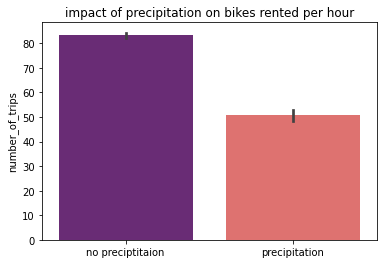

In [21]:
g = sns.barplot(x="precip",y="number_of_trips",data=data, palette="magma")
g.set(xticklabels=["no preciptitaion", "precipitation"])
g.set_xlabel('')
g.set_title('impact of precipitation on bikes rented per hour')

In [22]:
number_trips_no_prec = data[data.precip < 1].number_of_trips.sum()
avg_number_trips_no_prec = number_trips_no_prec / data[data.precip < 1].number_of_trips.count()
print('The average number of trips per hour when there is no precipitation is {0}.'.format(avg_number_trips_no_prec))
number_trips_prec = data[data.precip > 0].number_of_trips.sum()
avg_number_trips_prec = number_trips_prec /  data[data.precip > 0].number_of_trips.count()
print('The average number of trips per hour when there is precipitation is {0}.'.format(avg_number_trips_prec))

The average number of trips per hour when there is no precipitation is 83.17891840053372.
The average number of trips per hour when there is precipitation is 50.603619129685484.


### 'max_temp' and 'min_temp'
The following plot illustrates the impact of temperature on the number of bikes rented. The distribution leads to the assumption that with low temperatues less customers are attracted to renting bikes compared to higher temperatures. In order to account for relation, we include 'max_temp' and 'min_temp' among our predictors.

Text(0, 0.5, 'number of trips')

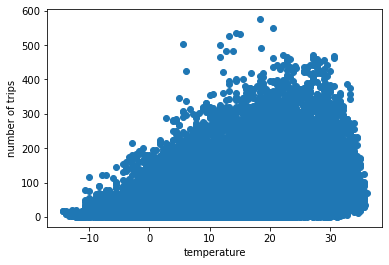

In [23]:
data['avg_temp'] = (data.max_temp + data.min_temp) / 2
x = data['avg_temp']
y = data['number_of_trips']
plt.scatter(x,y)
plt.xlabel("temperature")
plt.ylabel("number of trips")

### 'is_holiday_or_weekday'
The following plot illustrates the impact of a holidays or weekends on the distribution of rented bikes. Seemingly, on normal working days there are more bikes beeing rented per hour compared to holidays or weekends. To account for this, we include 'is_holiday_or_weekend' among our predictors.

Text(0.5, 1.0, 'impact of holidays and weekends on bikes rented per hour')

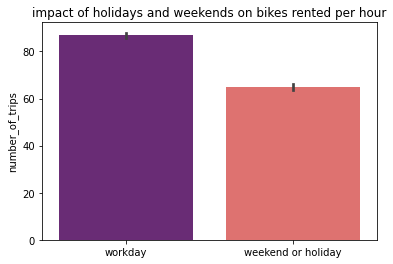

In [24]:
g = sns.barplot(x="is_holiday_or_weekend",y="number_of_trips",data=data, palette="magma")
g.set(xticklabels=["workday", "weekend or holiday"])
g.set_xlabel('')
g.set_title('impact of holidays and weekends on bikes rented per hour')

In [25]:
number_trips_no_holiday_or_weekend = data[data.is_holiday_or_weekend == False].number_of_trips.sum()
avg_number_trips_no_holiday_or_weekend = number_trips_no_holiday_or_weekend / data[data.is_holiday_or_weekend == False].number_of_trips.count()
print('The average number of trips per hour if the current day is neither on the weekend or on a holiday is {0}.'.format(avg_number_trips_no_holiday_or_weekend))
number_trips_holiday_or_weekend = data[data.is_holiday_or_weekend == True].number_of_trips.sum()
avg_number_trips_holiday_or_weekend = number_trips_holiday_or_weekend / data[data.is_holiday_or_weekend == True].number_of_trips.count()
print('The average number of trips per hour if the current day is on the weekend or on a holiday is {0}.'.format(avg_number_trips_holiday_or_weekend))

The average number of trips per hour if the current day is neither on the weekend or on a holiday is 86.79603842832469.
The average number of trips per hour if the current day is on the weekend or on a holiday is 64.8371913580247.


### 'day_of_week', 'month', 'hour
The following plots illustrate the distribution of trips over hours, weekdays and months.  

### hour
As you can see in belove's plot there seem to be rush hours around 8 a.m. and 7 p.m. where the demand peaks. Furthermore, at midnight and the following hours after, the demand is low. To keep track of this relation we include hour to our predictor variables.

Text(0.5, 1.0, 'Hourly repartition of the rides')

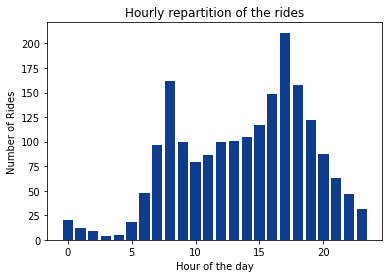

In [26]:
grouped_by_hour_for_graph = data.groupby("hour")[
    'number_of_trips'].describe()
grouped_by_hour_for_graph
plt.bar(grouped_by_hour_for_graph.index,
        grouped_by_hour_for_graph["mean"], color='#103c8e')
f = plt.gca()
plt.xlabel("Hour of the day")
plt.ylabel("Number of Rides")
plt.title("Hourly repartition of the rides")

### dayofweek
Weekdays influence the distribution of bikes rented too. On the weekends there are less bikes rented then during weekdays. Among the weekdays the demand peaks on wednesday. Thus, to incoorporate this we include 'dayofweek' to our predictors.s

In [27]:
mapping_day = {0: "Monday", 1: "Tuesday", 2: "Wednesday",
           3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
day_order = ["Monday", "Tuesday", "Wednesday",
             "Thursday", "Friday", "Saturday", "Sunday"]



In [28]:
data_copy = data.copy()
data_copy = data_copy.replace({"dayofweek": mapping_day})

Text(0.5, 1.0, 'Rides per day of the week')

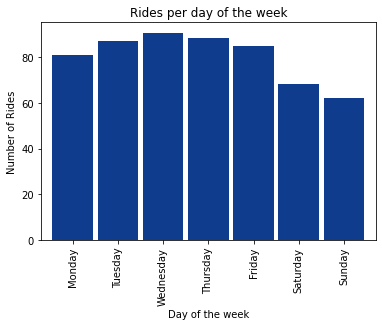

In [29]:
grouped_by_weekday = data_copy.groupby(
    "dayofweek")['number_of_trips'].describe()
ax = grouped_by_weekday["mean"].loc[day_order].plot(
    kind="bar", legend=False, color='#103c8e', width=0.9)
plt.xlabel("Day of the week")
plt.ylabel("Number of Rides")
plt.title("Rides per day of the week")


### month
As you can see, during the summer months most bikes are rented. Starting from september the demand declines steadily until february where the demands starts to increase again.
To keep track of this we include months in to our predictors.

In [30]:
mapping_month = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
           7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}
month_order = ["Jan", "Feb", "Mar", "Apr", "May",
               "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

Text(0.5, 1.0, 'Rides per Month')

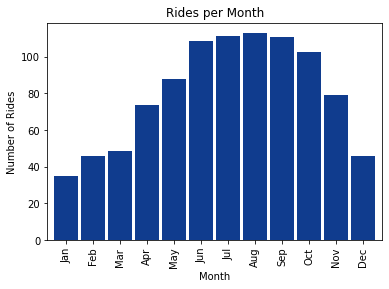

In [31]:
data_copy = data_copy.replace({"month": mapping_month})
grouped_by_monthstart = data_copy.groupby(
    "month")['number_of_trips'].describe()
ax = grouped_by_monthstart["mean"].loc[month_order].plot(
    kind="bar", legend=False, color='#103c8e', width=0.9)
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.title("Rides per Month")

# Prediction Models


## ARIMA


In [32]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline


In [33]:
arimaData = data
arimaData = pd.DataFrame(arimaData["number_of_trips"])
arimaData.index.name = "time_stamp"

fullArimaData = arimaData
# define train and test split
# test data (data to predict) is data from 2018
testArimaData = arimaData.tail(8760)
# training data is data from 2016 & 2017
arimaData = arimaData.head(17544)


testArimaData


number_of_trips
time_stamp                          
2018-01-01 00:00:00              3.0
2018-01-01 01:00:00              5.0
2018-01-01 02:00:00              8.0
2018-01-01 03:00:00              2.0
2018-01-01 04:00:00              1.0
...                              ...
2018-12-31 19:00:00             17.0
2018-12-31 20:00:00              7.0
2018-12-31 21:00:00              4.0
2018-12-31 22:00:00              3.0
2018-12-31 23:00:00              6.0

[8760 rows x 1 columns]

In [34]:
data


max_temp  min_temp  precip  number_of_trips  dayofweek  \
time_stamp                                                                    
2016-01-01 00:00:00       6.7       6.7     0.0             26.0          4   
2016-01-01 01:00:00       7.2       7.2     0.0             40.0          4   
2016-01-01 02:00:00       6.7       6.7     0.0             33.0          4   
2016-01-01 03:00:00       6.7       6.7     0.0              6.0          4   
2016-01-01 04:00:00       6.1       6.1     0.0              1.0          4   
...                       ...       ...     ...              ...        ...   
2018-12-31 19:00:00       7.2       7.2     1.0             17.0          0   
2018-12-31 20:00:00       7.2       7.2     1.0              7.0          0   
2018-12-31 21:00:00       6.7       6.7     1.0              4.0          0   
2018-12-31 22:00:00       7.2       7.2     1.0              3.0          0   
2018-12-31 23:00:00       6.1       6.1     1.0              6.0          0   

                     month  hour  is_holiday_or_weekend  avg_temp  
time_stamp                                                         
2016-01-01 00:00:00      1     0                  False       6.7  
2016-01-01 01:00:00      1     1                  False       7.2  
2016-01-01 02:00:00      1     2                  False       6.7  
2016-01-01 03:00:00      1     3                  False       6.7  
2016-01-01 04:00:00      1     4                  False       6.1  
...                    ...   ...                    ...       ...  
2018-12-31 19:00:00     12    19                  False       7.2  
2018-12-31 20:00:00     12    20                  False       7.2  
2018-12-31 21:00:00     12    21                  False       6.7  
2018-12-31 22:00:00     12    22                  False       7.2  
2018-12-31 23:00:00     12    23                  False       6.1  

[26304 rows x 9 columns]

In [35]:
arimaData


number_of_trips
time_stamp                          
2016-01-01 00:00:00             26.0
2016-01-01 01:00:00             40.0
2016-01-01 02:00:00             33.0
2016-01-01 03:00:00              6.0
2016-01-01 04:00:00              1.0
...                              ...
2017-12-31 19:00:00             14.0
2017-12-31 20:00:00              4.0
2017-12-31 21:00:00              8.0
2017-12-31 22:00:00             10.0
2017-12-31 23:00:00              6.0

[17544 rows x 1 columns]

<AxesSubplot:xlabel='time_stamp'>

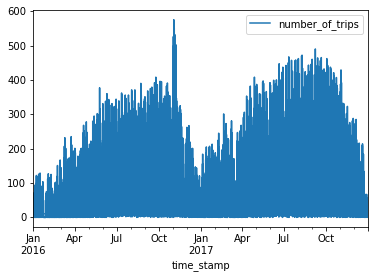

In [36]:
arimaData.plot(y="number_of_trips")


In [37]:
from statsmodels.tsa.stattools import adfuller


def test_stationarity(timeseries):

    # Determing rolling statistics (168 window => weekly)
    rolmean = timeseries.rolling(window=168).mean()
    rolstd = timeseries.rolling(window=168).std()

    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:\n')
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index=[
                         'Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)


In [38]:
adfuller(arimaData['number_of_trips'])


(-7.2273566936970814,
 2.0365894048235332e-10,
 44,
 17499,
 {'1%': -3.430723750472268,
  '5%': -2.8617051832726124,
  '10%': -2.5668579227683557},
 167199.01623403025)

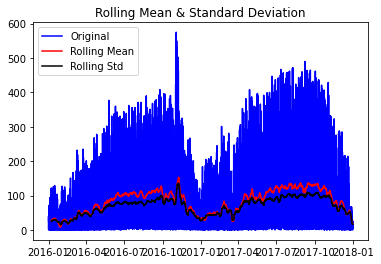

Results of Dickey-Fuller Test:

Test Statistic                -7.227357e+00
p-value                        2.036589e-10
#Lags Used                     4.400000e+01
Number of Observations Used    1.749900e+04
Critical Value (1%)           -3.430724e+00
Critical Value (5%)           -2.861705e+00
Critical Value (10%)          -2.566858e+00
dtype: float64


In [39]:
test_stationarity(arimaData['number_of_trips'])


p value is basically 0, no matter what size of rolling mean/std/number of years in data, so this data seems to be stationary. Overall (yearly) trend does seem to be 0.


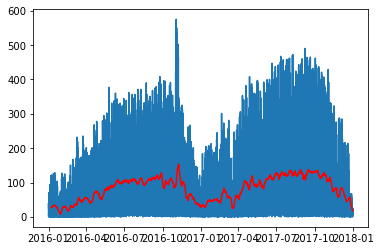

In [40]:
moving_avg = arimaData.rolling(168).mean()
plt.plot(arimaData)
plt.plot(moving_avg, color='red')


### moving average


In [41]:
moving_avg_diff = arimaData - moving_avg
moving_avg_diff.dropna(inplace=True)
moving_avg_diff


number_of_trips
time_stamp                          
2016-01-07 23:00:00       -16.470238
2016-01-08 00:00:00       -21.351190
2016-01-08 01:00:00       -23.136905
2016-01-08 02:00:00       -26.940476
2016-01-08 03:00:00       -26.904762
...                              ...
2017-12-31 19:00:00        -3.833333
2017-12-31 20:00:00       -13.797619
2017-12-31 21:00:00        -9.815476
2017-12-31 22:00:00        -7.857143
2017-12-31 23:00:00       -11.863095

[17377 rows x 1 columns]

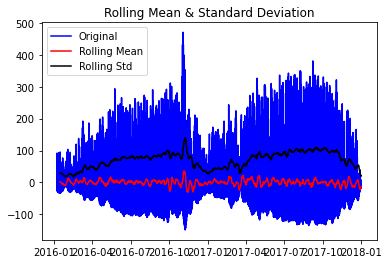

Results of Dickey-Fuller Test:

Test Statistic                -1.666078e+01
p-value                        1.574821e-29
#Lags Used                     4.200000e+01
Number of Observations Used    1.733400e+04
Critical Value (1%)           -3.430727e+00
Critical Value (5%)           -2.861707e+00
Critical Value (10%)          -2.566859e+00
dtype: float64


In [42]:
test_stationarity(moving_avg_diff)


test statistic is now even lower, leading to a p-value of 0


### weighted moving average


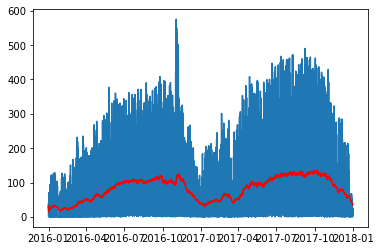

In [43]:
# Provides exponential weighted functions
expwighted_avg = arimaData.ewm(halflife=168).mean()
plt.plot(arimaData)
plt.plot(expwighted_avg, color='red')


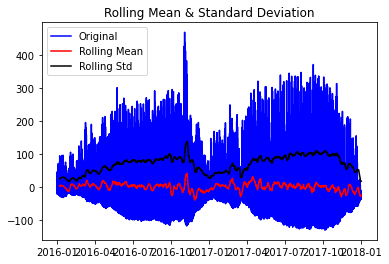

Results of Dickey-Fuller Test:

Test Statistic                -1.508228e+01
p-value                        8.421029e-28
#Lags Used                     4.400000e+01
Number of Observations Used    1.749900e+04
Critical Value (1%)           -3.430724e+00
Critical Value (5%)           -2.861705e+00
Critical Value (10%)          -2.566858e+00
dtype: float64


In [44]:
ewma_diff = arimaData - expwighted_avg
test_stationarity(ewma_diff)


results are slightly worse than "normal" moving average, but p value is still 0


### differencing


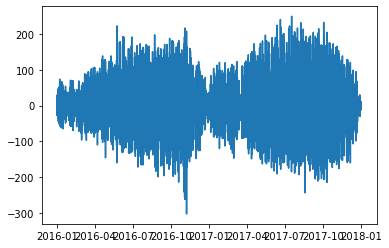

In [45]:
diff = arimaData - arimaData.shift()
plt.plot(diff)


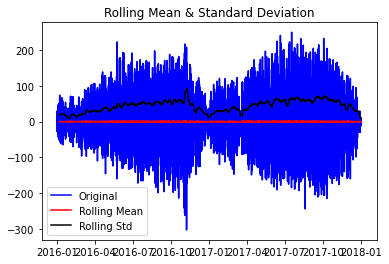

Results of Dickey-Fuller Test:

Test Statistic                   -29.860974
p-value                            0.000000
#Lags Used                        44.000000
Number of Observations Used    17498.000000
Critical Value (1%)               -3.430724
Critical Value (5%)               -2.861705
Critical Value (10%)              -2.566858
dtype: float64


In [46]:
diff.dropna(inplace=True)
test_stationarity(diff)


best result so far


### Decomposing


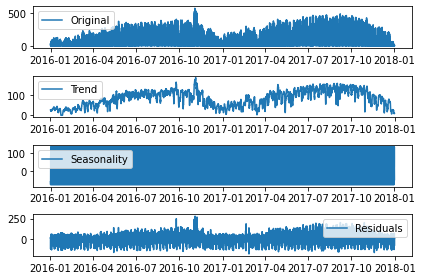

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal decomposition using moving averages
decomposition = seasonal_decompose(arimaData)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(arimaData, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


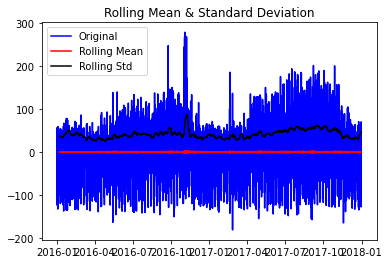

Results of Dickey-Fuller Test:

Test Statistic                   -36.054996
p-value                            0.000000
#Lags Used                        44.000000
Number of Observations Used    17475.000000
Critical Value (1%)               -3.430724
Critical Value (5%)               -2.861705
Critical Value (10%)              -2.566858
dtype: float64


In [48]:
decompose = residual
decompose.dropna(inplace=True)
test_stationarity(decompose)


decomposing leads to the overall best result regarding the Dickey-Fuller Test. Therefore, the decomposed values will be used for the ARIMA model


### ACF / PACF


In [49]:
from statsmodels.tsa.stattools import acf, pacf


In [50]:
lag_acf = acf(diff, nlags=5)
lag_pacf = pacf(diff, nlags=5, method='ols')


Text(0.5, 1.0, 'Autocorrelation Function')

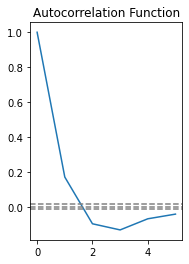

In [51]:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
# the axis lines are at around 0.01 so they are not that visible
plt.axhline(y=-1.96/np.sqrt(len(diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')


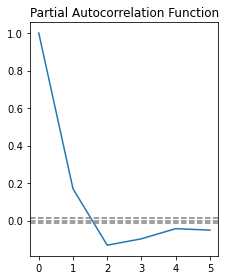

In [52]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
# the axis lines are at around 0.01 so they are not that visible
plt.axhline(y=-1.96/np.sqrt(len(diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


The lag value where acf crosse the upper confidence interval for the first time is around 1.7 so q=2

The lag value where pacf crosse the upper confidence interval for the first time is around 1.6 so p=2


## ARIMA model


In [53]:
from statsmodels.tsa.arima.model import ARIMA


In [54]:
warnings.filterwarnings("ignore")
# p and q from above
model = ARIMA(decompose, order=(2, 1, 2))
model_fit = model.fit()
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  resid   No. Observations:                17520
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -84594.907
Date:                Sat, 29 Jan 2022   AIC                         169199.814
Time:                        14:00:57   BIC                         169238.670
Sample:                    01-01-2016   HQIC                        169212.609
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3006      0.004    -79.602      0.000      -0.308      -0.293
ar.L2          0.6994      0.004    185.121      0.000       0.692       0.707
ma.L1         -0.0003      0.006     -0.052      0.958      -0.013       0.012
ma.L2         -0.9997      0.006   -157.012      0.000      -1.012      -0.987
sigma2       915.0641   1.39e-05   6.61e+07      0.000     915.064     915.064
===================================================================================
Ljung-Box (L1) (Q):                 647.35   Jarque-Bera (JB):             10993.38
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.74   Skew:                             0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.29e+22. Standard errors may be unstable.
"""

### ARIMA Forecasting


In [55]:
decomposition = seasonal_decompose(testArimaData)
trend = decomposition.trend
seasonal = decomposition.seasonal


In [56]:
validation_df = pd.DataFrame(trend)
# forecast 2018 data only
validation_df["residual_prediction"] = model_fit.forecast(
    steps=dt.datetime(2019, 1, 1, 0))
validation_df["seasonal"] = seasonal
# add back seasonal and trend to compare prediction to actual values
validation_df["prediction"] = validation_df["trend"] + \
    validation_df["seasonal"]+validation_df["residual_prediction"]
validation_df.dropna()


trend  residual_prediction   seasonal  prediction
time_stamp                                                                
2018-01-01 12:00:00   8.541667            -0.240389  19.259868   27.561146
2018-01-01 13:00:00   8.416667             0.255252  20.674417   29.346336
2018-01-01 14:00:00   8.166667            -0.240733  24.169266   32.095200
2018-01-01 15:00:00   7.958333             0.255007  35.721636   43.934976
2018-01-01 16:00:00   7.916667            -0.240900  64.196739   71.872505
...                        ...                  ...        ...         ...
2018-12-31 07:00:00  23.979167             0.245138  16.210074   40.434378
2018-12-31 08:00:00  23.020833            -0.231425  77.045010   99.834418
2018-12-31 09:00:00  21.854167             0.245135  17.979305   40.078607
2018-12-31 10:00:00  20.916667            -0.231423  -0.805894   19.879350
2018-12-31 11:00:00  20.666667             0.245133   6.688726   27.600526

[8736 rows x 4 columns]

In [57]:
testArimaData["prediction"] = validation_df["prediction"]
# set negative predictions to 0, since demand can't be negative
testArimaData["prediction"][testArimaData["prediction"] < 0] = 0
# round prediction to nearest integer, since bikes can't be half rented (does not affect error significantly)
testArimaData = testArimaData.round({"prediction": 0})
testArimaData["prediction_abs_error"] = abs(testArimaData["prediction"] -
                                            testArimaData["number_of_trips"])
# the first and last 12 values are not predicted
testArimaData.dropna()


number_of_trips  prediction  prediction_abs_error
time_stamp                                                            
2018-01-01 12:00:00              8.0        28.0                  20.0
2018-01-01 13:00:00              9.0        29.0                  20.0
2018-01-01 14:00:00             21.0        32.0                  11.0
2018-01-01 15:00:00             15.0        44.0                  29.0
2018-01-01 16:00:00             18.0        72.0                  54.0
...                              ...         ...                   ...
2018-12-31 07:00:00             20.0        40.0                  20.0
2018-12-31 08:00:00             61.0       100.0                  39.0
2018-12-31 09:00:00             51.0        40.0                  11.0
2018-12-31 10:00:00             35.0        20.0                  15.0
2018-12-31 11:00:00             67.0        28.0                  39.0

[8736 rows x 3 columns]

#### calculate prediction errors


Text(0.5, 1.0, 'absolute error in forecasting')

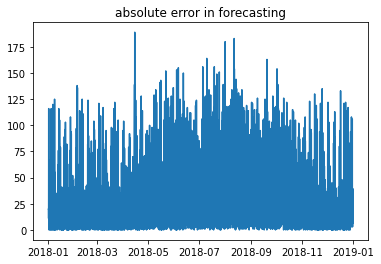

In [58]:
plt.plot(testArimaData["prediction_abs_error"])
plt.title("absolute error in forecasting")


##### mean errors


In [59]:
print("mean squared error: " +
      str((testArimaData["prediction_abs_error"]**2).mean()))
print("mean absolute error: " +
      str(testArimaData["prediction_abs_error"].mean()))


mean squared error: 1305.0184294871794
mean absolute error: 25.421130952380953


In [60]:
# average number of trips per hour
testArimaData["number_of_trips"].mean()


76.32237442922374

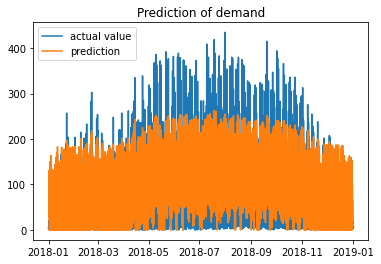

In [61]:
plt.plot(testArimaData["number_of_trips"], label="actual value")
plt.plot(testArimaData["prediction"], label="prediction")
plt.title("Prediction of demand")
plt.legend()


## Random Forest


Only include data data from 2018


In [62]:
data_random_forest = data[data.index.year == 2018]


Remove target 'number_of_trips' to retrieve the features


In [63]:
target = data_random_forest['number_of_trips']
features = data_random_forest.drop(['number_of_trips'], axis=1)
feature_list = list(features.columns)
features.head(5)


max_temp  min_temp  precip  dayofweek  month  hour  \
time_stamp                                                                
2018-01-01 00:00:00     -10.6     -10.6     0.0          0      1     0   
2018-01-01 01:00:00     -10.6     -10.6     0.0          0      1     1   
2018-01-01 02:00:00     -11.1     -11.1     0.0          0      1     2   
2018-01-01 03:00:00     -12.2     -12.2     0.0          0      1     3   
2018-01-01 04:00:00     -11.7     -11.7     0.0          0      1     4   

                     is_holiday_or_weekend  avg_temp  
time_stamp                                            
2018-01-01 00:00:00                   True     -10.6  
2018-01-01 01:00:00                   True     -10.6  
2018-01-01 02:00:00                   True     -11.1  
2018-01-01 03:00:00                   True     -12.2  
2018-01-01 04:00:00                   True     -11.7

#### Split the data sets


In [64]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(
    features, target,  random_state=0)


In [65]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


Training Features Shape: (6570, 8)
Training Labels Shape: (6570,)
Testing Features Shape: (2190, 8)
Testing Labels Shape: (2190,)


#### Train Model


In [66]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
# Train the model on training data
rf.fit(train_features, train_labels)


RandomForestRegressor(n_estimators=1000, random_state=42)

In [67]:
predictions = rf.predict(test_features)
predictions[predictions < 0]


array([], dtype=float64)

#### calculate prediction errors

In [68]:
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), ' rented bikes.')


Mean Absolute Error: 16.56  rented bikes.


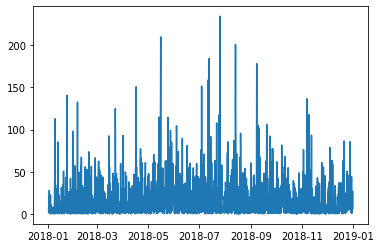

In [69]:
errors = errors.sort_index()
plt.plot(errors)


## Polynomial regression


In [70]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


only include data from 2018


In [71]:
data_polynomial_regression = data[data.index.year == 2018]


Function that transforms the input features to the wanted dimension


In [72]:
def fit_and_transform_features_to_new_dimension(new_dim, features):
    poly_reg = PolynomialFeatures(degree=new_dim)
    return poly_reg.fit_transform(features)


#### PCA 

PCA is used to reduce some noise before applying the regression

In [73]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features)
features_scaled = scaler.transform(features)
pca = PCA(n_components=1)
X_pca = pca.fit_transform(features_scaled)


In [74]:
print(pca.explained_variance_ratio_[0])


0.3891258102938303


Using only one component does not supply a sufficient explained variance ratio of 95%.


Next we increase the number to five components


In [75]:
pca5 = PCA(n_components=5)
X_pca5 = pca5.fit_transform(features_scaled)


In [76]:
print(sum(pca5.explained_variance_ratio_))


0.9626112255431731


Using five components we reach an explained variance over 95%. Thus, we decide to use five components in the following regression.


new train-test split as we have the new variables with the pca


In [77]:
train_features, test_features, train_labels, test_labels = train_test_split(
    X_pca5, target,  random_state=0)


Function that creates a new regression model and fits it with input features


In [78]:
def create_and_fit_model(test_features, test_labels):
    # normalization is redundant as features are already normalized for PCA, but to be on the safe side we normalize once more
    lin_reg_2 = LinearRegression(normalize=True)
    lin_reg_2.fit(test_features, test_labels)
    return lin_reg_2


Function to compute mean average error for a regression model


In [79]:
def compute_mean_average_error(polynomial_regression, test_features, test_labels):
    predictions = polynomial_regression.predict(test_features)
    abs_error = abs(predictions - test_labels)
    return round(np.mean(abs_error), 2)


#### Compute errors

Compute mean average error for degree one to ten for test and training data set.


In [80]:
# quick for range(1,11), compute time rises exponentially for higher ranges
test_errors = pd.Series([], dtype='float64')
training_errors = pd.Series([], dtype='float64')
for i in range(1, 11):
    train_features_dim_i = fit_and_transform_features_to_new_dimension(
        i, train_features)
    test_features_dim_i = fit_and_transform_features_to_new_dimension(
        i, test_features)
    regression_model_dim_i = create_and_fit_model(
        train_features_dim_i, train_labels)
    mean_avg_error_test = compute_mean_average_error(
        regression_model_dim_i, test_features_dim_i, test_labels)
    mean_avg_error_train = compute_mean_average_error(
        regression_model_dim_i, train_features_dim_i, train_labels)
    test_errors[i] = mean_avg_error_test
    training_errors[i] = mean_avg_error_train


Plot mean absolute error for the different degrees.


(0.0, 100.0)

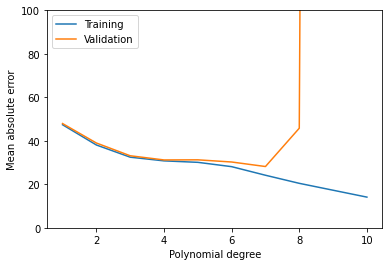

In [81]:
plt.plot(training_errors)
plt.plot(test_errors)
plt.legend(["Training", "Validation"])
plt.xlabel("Polynomial degree")
plt.ylabel("Mean absolute error")
plt.ylim(0,100)



Show the five degrees with the lowest average error in the predction.


In [82]:
test_errors.sort_values().head(n=5)


7    28.18
6    30.26
4    31.21
5    31.26
3    33.13
dtype: float64

We take the model with degree = 7.


## Regularization


Retrieve the five highest coefficients for our features


In [83]:
train_features_dim_7 = fit_and_transform_features_to_new_dimension(
    7, train_features)
test_features_dim_7 = fit_and_transform_features_to_new_dimension(
    7, test_features)
regression_model_dim_7 = create_and_fit_model(
    train_features_dim_7, train_labels)
sorted_index_array = np.argsort(regression_model_dim_7.coef_)
regression_model_dim_7.coef_[sorted_index_array[-5:]]


array([25001693.4253017 , 26737837.28714753, 34054792.0110869 ,
       51244781.08470955, 56356736.42813744])

Retrieve the five lowest coeffecients for out features


In [84]:
regression_model_dim_7.coef_[sorted_index_array[1:6]]


array([-65836669.47196558, -48874312.88094873, -34765268.4681879 ,
       -31843189.12744341, -29113721.40538615])

#### Ridge regression


Search for a good and appropriate alpha value.


In [85]:
from sklearn.linear_model import Ridge
alphas = np.logspace(-10, 10, 100)
test_errors_l2 = pd.Series([], dtype='float64')
training_errors_l2 = pd.Series([], dtype='float64')
for alpha in alphas:
    model_L2 = Ridge(alpha=alpha, normalize=True, solver='lsqr')
    model_L2.fit(train_features_dim_7, train_labels)
    test_errors_l2[alpha] = compute_mean_average_error(
        model_L2, test_features_dim_7, test_labels)
    training_errors_l2[alpha] = compute_mean_average_error(
        model_L2, train_features_dim_7, train_labels)


Plot mean average error for the different alpha values


Text(0.5, 1.0, 'Ridge regression')

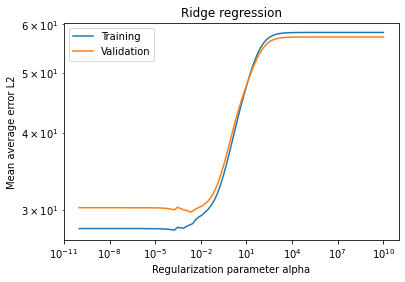

In [86]:
plt.loglog(alphas, training_errors_l2, alphas, test_errors_l2)
plt.legend(["Training", "Validation"])
plt.xlabel("Regularization parameter alpha")
plt.ylabel("Mean average error L2")
plt.title("Ridge regression")


In [87]:
print("We have the lowest mean average error of {0} for alpha = {1}".format(test_errors_l2[test_errors_l2.sort_values(
).head(n=1).index].values[0], str(test_errors_l2.sort_values().head(n=1).index)[14:19]))


We have the lowest mean average error of 29.76 for alpha = 0.001


Thus with the regularization our mean average error rose slightly, so the original regression was better.


#### Lasso regression


In [88]:
# takes 4 minutes
from sklearn.linear_model import Lasso
alphas = np.logspace(-10, 10, 100)
test_errors_l1 = pd.Series([], dtype='float64')
training_errors_l1 = pd.Series([], dtype='float64')
for alpha in alphas:
    model_L1 = Lasso(alpha=alpha)
    model_L1.fit(train_features_dim_7, train_labels)
    test_errors_l1[alpha] = compute_mean_average_error(
        model_L1, test_features_dim_7, test_labels)
    training_errors_l1[alpha] = compute_mean_average_error(
        model_L1, train_features_dim_7, train_labels)


Text(0.5, 1.0, 'Lasso regression')

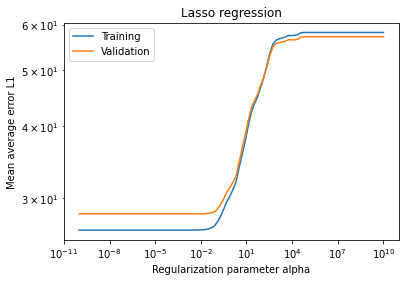

In [89]:
plt.loglog(alphas, training_errors_l1, alphas, test_errors_l1)
plt.legend(["Training", "Validation"])
plt.xlabel("Regularization parameter alpha")
plt.ylabel("Mean average error L1")
plt.title("Lasso regression")


In [90]:
print("We have the lowest mean average error of {0} for alpha = {1}".format(test_errors_l1[test_errors_l1.sort_values(
).head(n=1).index].values[0], str(test_errors_l1.sort_values().head(n=1).index)[14:19]))


We have the lowest mean average error of 28.2 for alpha = 0.007


with the lasso regression our result improved slightly.